# Exploratory Data Analysis - Mental Health Dataset
This notebook contains an exploratory data analysis of the mental health dataset to understand patterns and relationships in the data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_palette('husl')

# Display all columns
pd.set_option('display.max_columns', None)

colors = ['#67001f', '#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#f7f7f7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac', '#053061']

## Data Loading and Initial Data Exploration

In [17]:
# Load the datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# Display basic information about the training dataset
print('Training Dataset Shape:', train_df.shape)
print('Training Dataset Info:')
train_df.info()

print('First few rows of the training dataset:')
train_df.head()

Training Dataset Shape: (140700, 20)
Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [15]:
print(f"There are {train_df.shape[1]} columns and {train_df.shape[0]} rows in the train dataset.")


There are 20 columns and 140700 rows in the train dataset.


### Data Types in the Dataset

In [16]:
print("Column names and data type of each column:")
train_df.dtypes

Column names and data type of each column:


id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

## Statistical Summary of Numerical Features

In [8]:
# Get statistical summary of numerical columns
print('Statistical Summary of Numerical Features:')
train_df.describe()

Statistical Summary of Numerical Features:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Missing Value Analysis

In [9]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print('Missing Value Analysis:')
missing_df[missing_df['Missing Values'] > 0]

Missing Value Analysis:


,Missing Values,Percentage
Profession,36630,26.034115
Academic Pressure,112803,80.172708
Work Pressure,27918,19.842217
CGPA,112802,80.171997
Study Satisfaction,112803,80.172708
Job Satisfaction,27910,19.836532
Dietary Habits,4,0.002843
Degree,2,0.001421
Financial Stress,4,0.002843


<Axes: title={'center': 'Visualizing Missing Values'}>

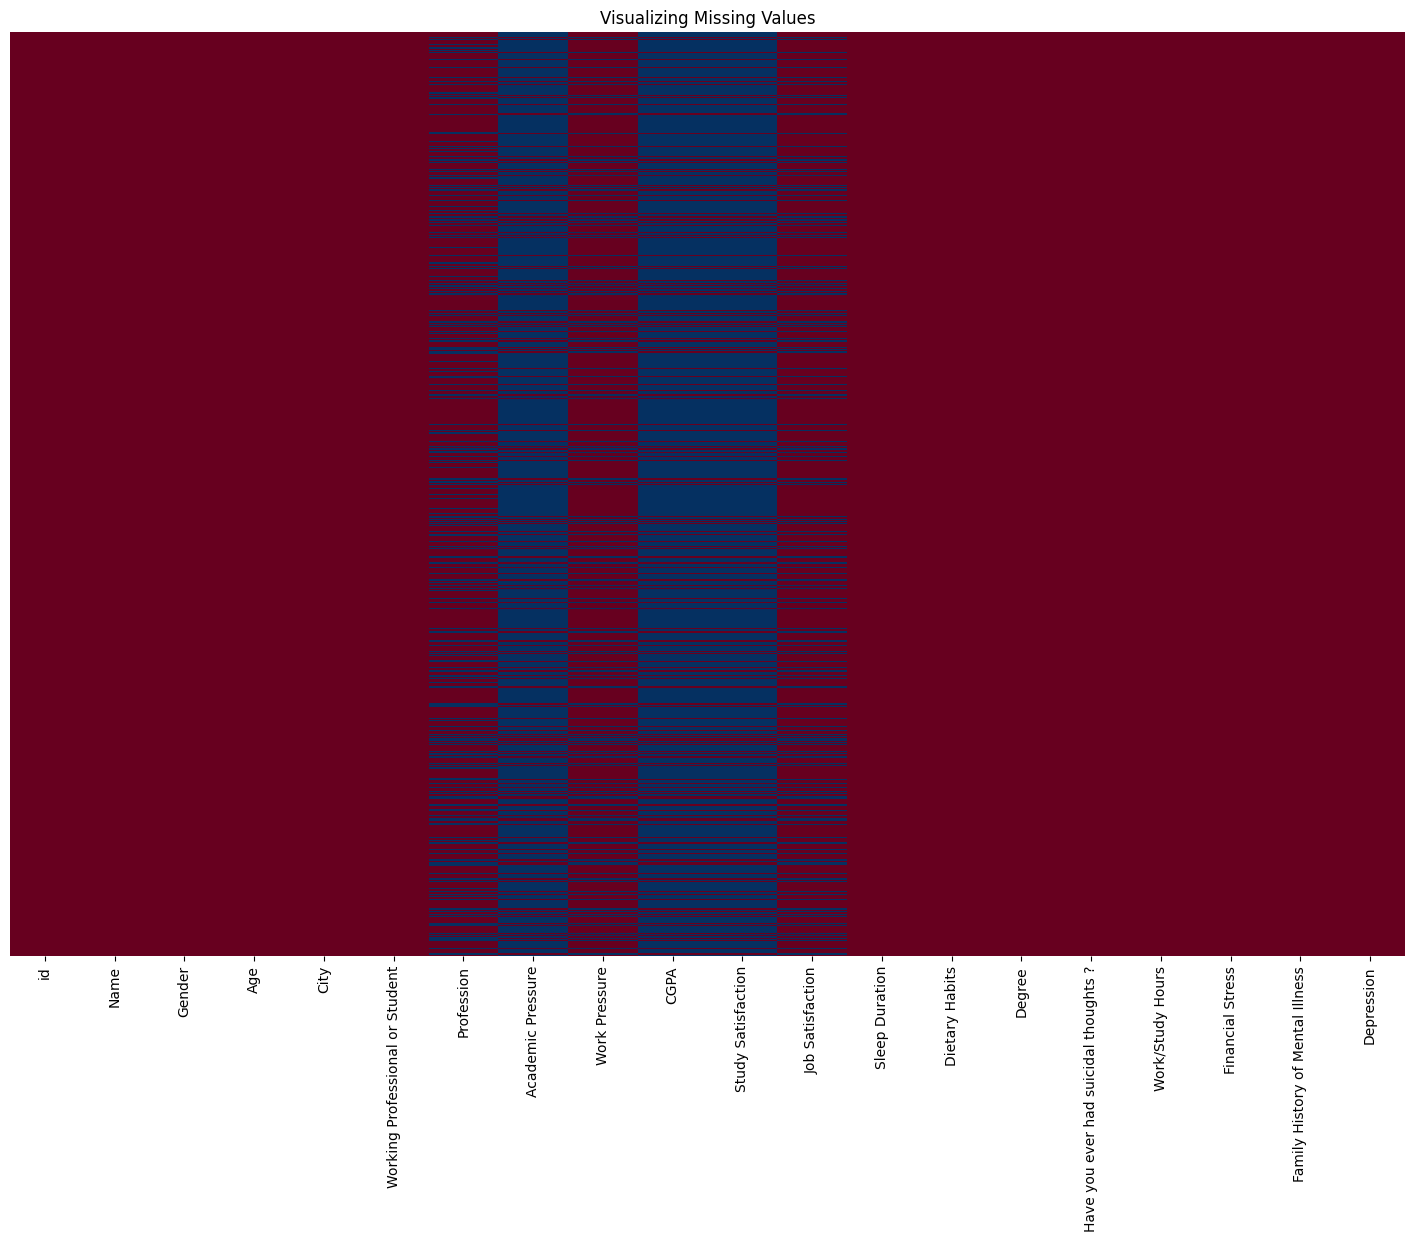

In [22]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(train_df.isnull(), cbar=False, cmap=sns.color_palette(colors), yticklabels=False)

## Data Separation for Categorical and Numerical

In [25]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['Name', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')
Numerical columns: Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')


### Removing the Target Column and id

In [27]:
target_column = 'Depression'
tain_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

### Categorical Variable Plots

In [ ]:
for column in categorical_columns:
    num_unique = train_df[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")
    

'Name' has 422 unique categories.
'Gender' has 2 unique categories.
'City' has 98 unique categories.
'Working Professional or Student' has 2 unique categories.
'Profession' has 64 unique categories.
'Sleep Duration' has 36 unique categories.
'Dietary Habits' has 23 unique categories.
'Degree' has 115 unique categories.
'Have you ever had suicidal thoughts ?' has 2 unique categories.
'Family History of Mental Illness' has 2 unique categories.


In [29]:
# Create a DataFrame with categorical columns and their unique value counts
cat_unique_counts = pd.DataFrame({
    'Column Name': categorical_columns,
    'Unique Categories': [train_df[column].nunique() for column in categorical_columns]
})

# Display the table with styling
display(cat_unique_counts.style.set_properties(**{
    'text-align': 'left',
    'padding': '8px',
    'border': '1px solid black'
}).set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2'),
               ('text-align', 'left'),
               ('padding', '8px'),
               ('border', '1px solid black')]}
]))

,Column Name,Unique Categories
0,Name,422
1,Gender,2
2,City,98
3,Working Professional or Student,2
4,Profession,64
5,Sleep Duration,36
6,Dietary Habits,23
7,Degree,115
8,Have you ever had suicidal thoughts ?,2
9,Family History of Mental Illness,2


## Numerical Data

In [31]:
# Create a DataFrame with skewness values
skewness_df = pd.DataFrame({
    'Column Name': numerical_columns,
    'Skewness': [train_df[col].skew() for col in numerical_columns]
})

# Display the table with styling
display(skewness_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '8px',
    'border': '1px solid black'
}).set_table_styles([
    {'selector': 'th',
     'props': [('background-color', '#f2f2f2'),
               ('text-align', 'left'),
               ('padding', '8px'),
               ('border', '1px solid black')]}
]))

,Column Name,Skewness
0,id,0.000000
1,Age,-0.217977
2,Academic Pressure,-0.133977
3,Work Pressure,0.018515
4,CGPA,-0.073636
5,Study Satisfaction,0.011764
6,Job Satisfaction,0.054361
7,Work/Study Hours,-0.128169
8,Financial Stress,0.035603
9,Depression,1.650852


## Feature Distribution Analysis

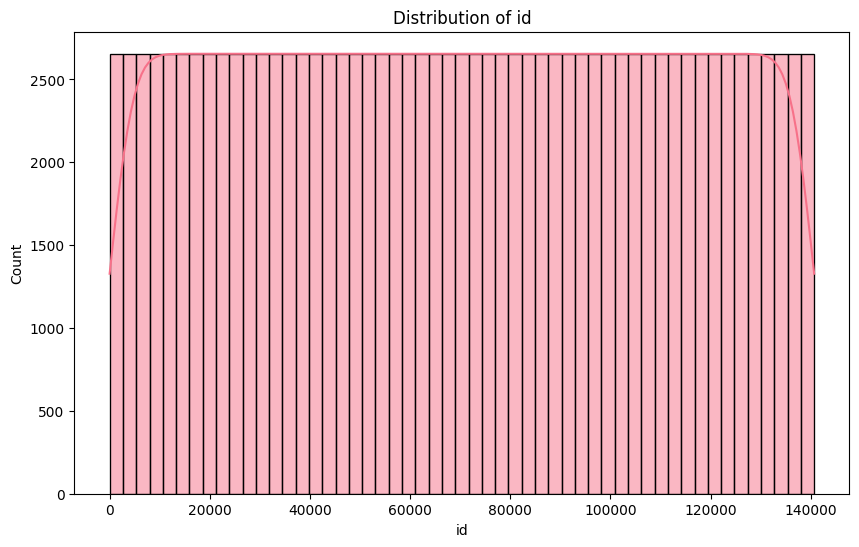

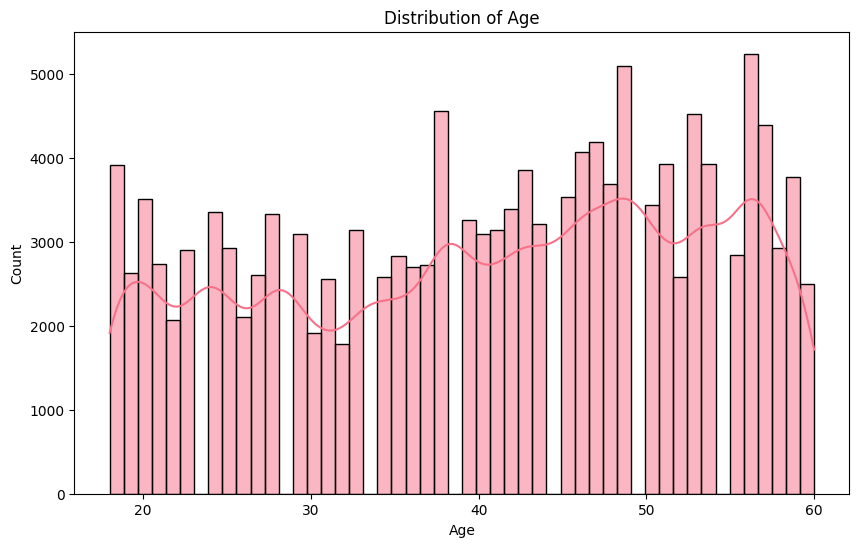

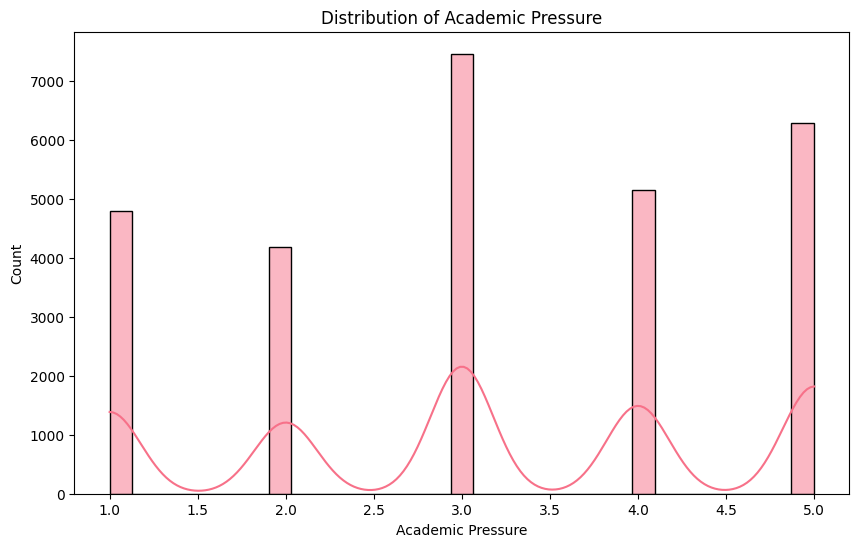

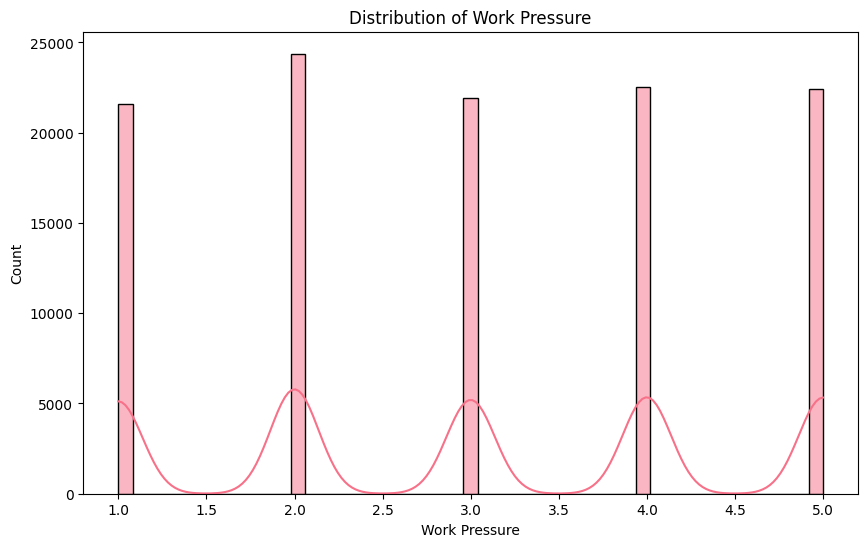

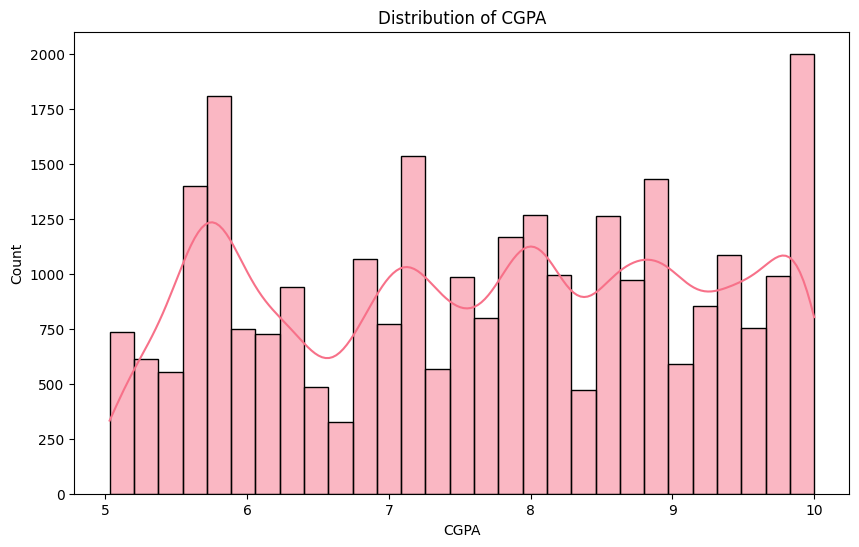

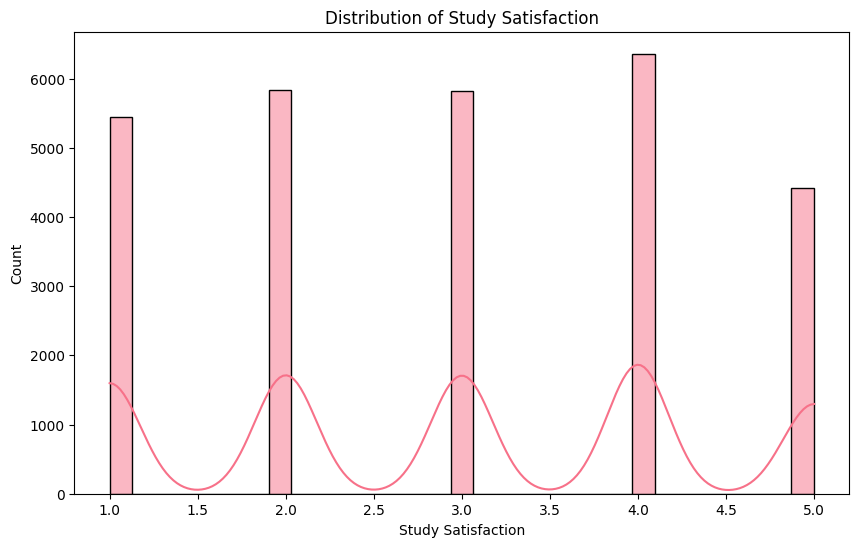

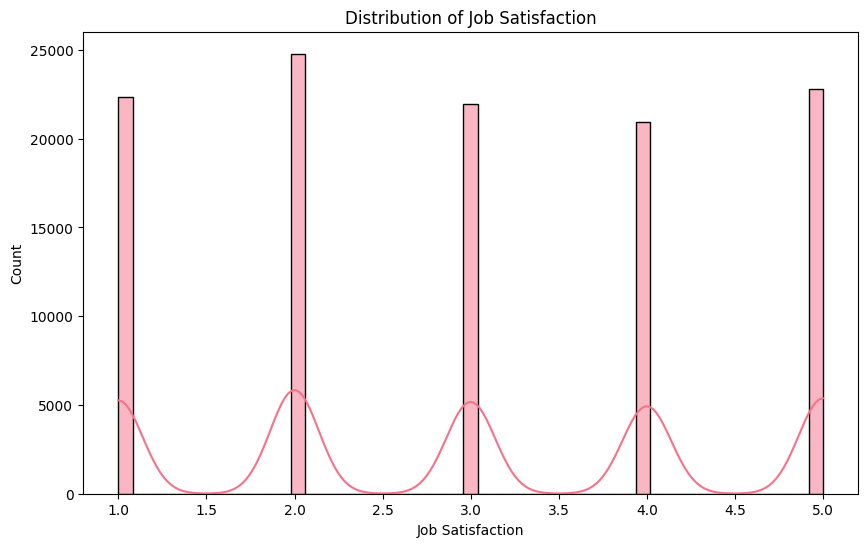

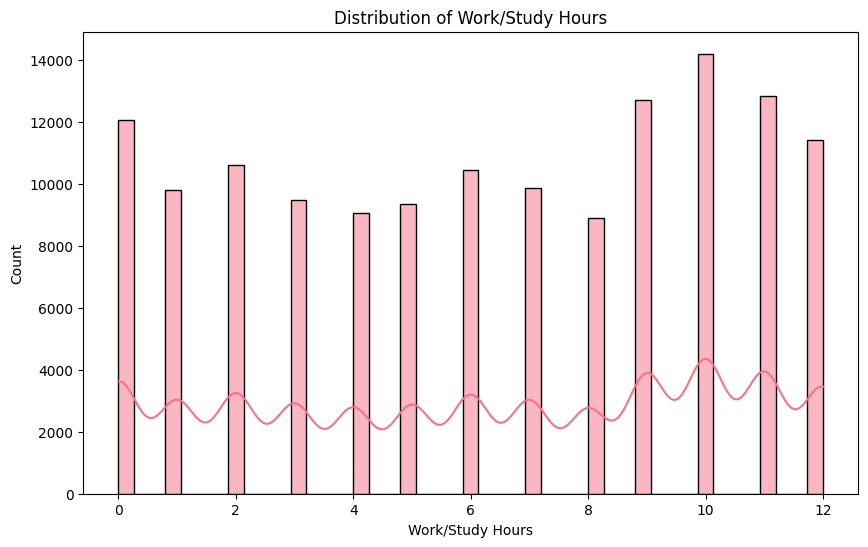

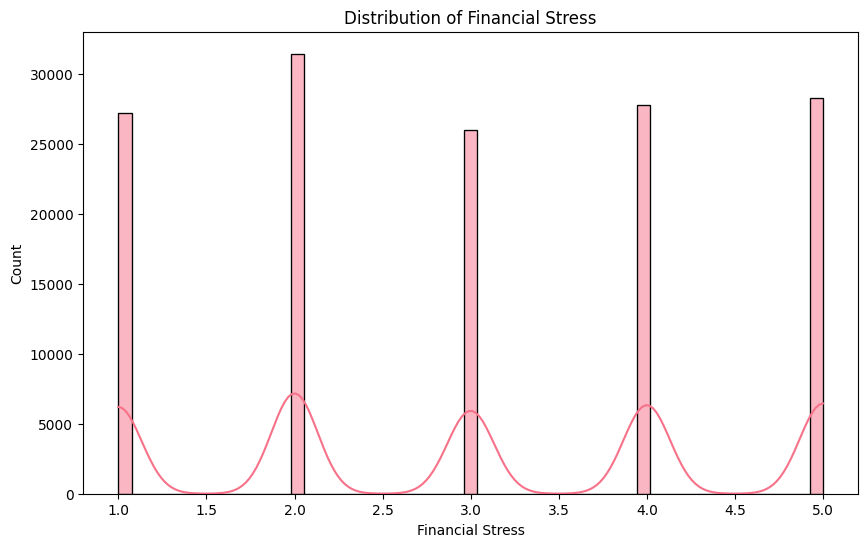

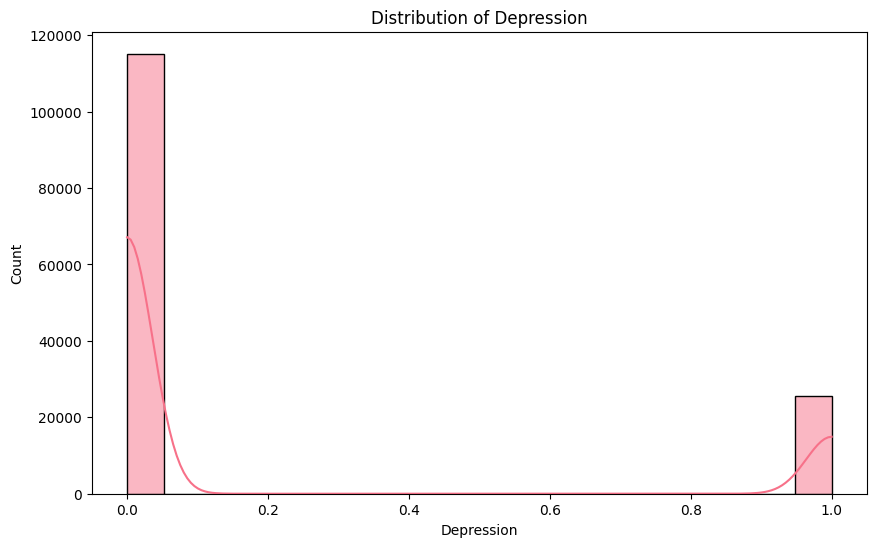

In [32]:
# Function to plot distribution for numerical features
def plot_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Plot distributions for numerical columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plot_distribution(train_df, column)

## Categorical Feature Analysis

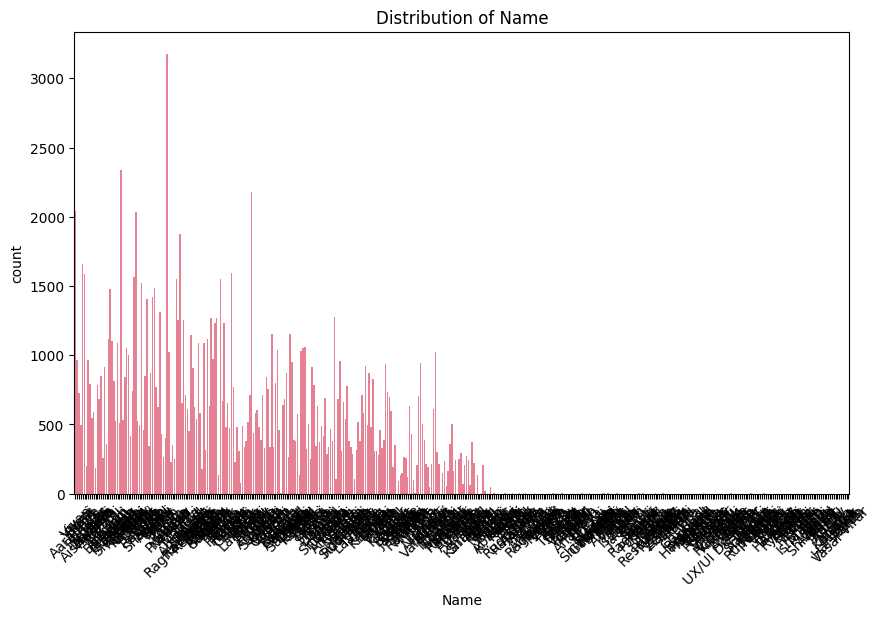

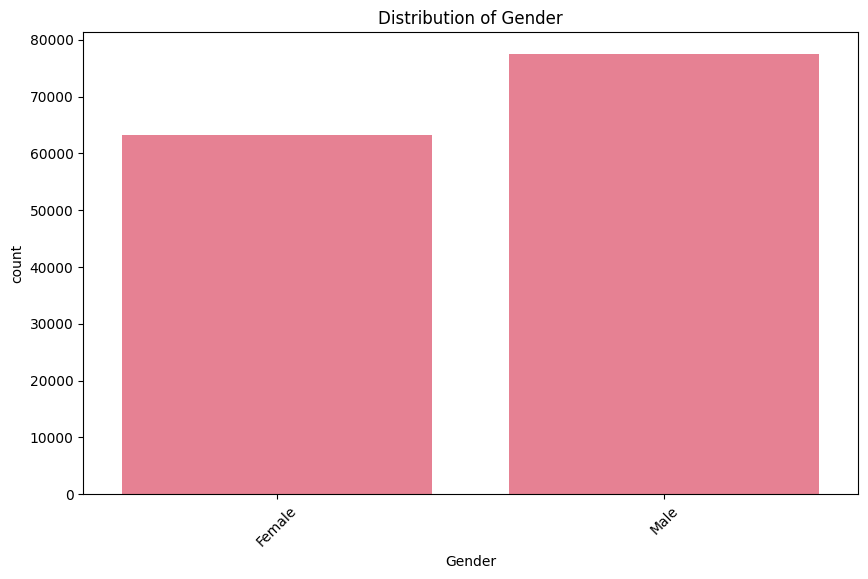

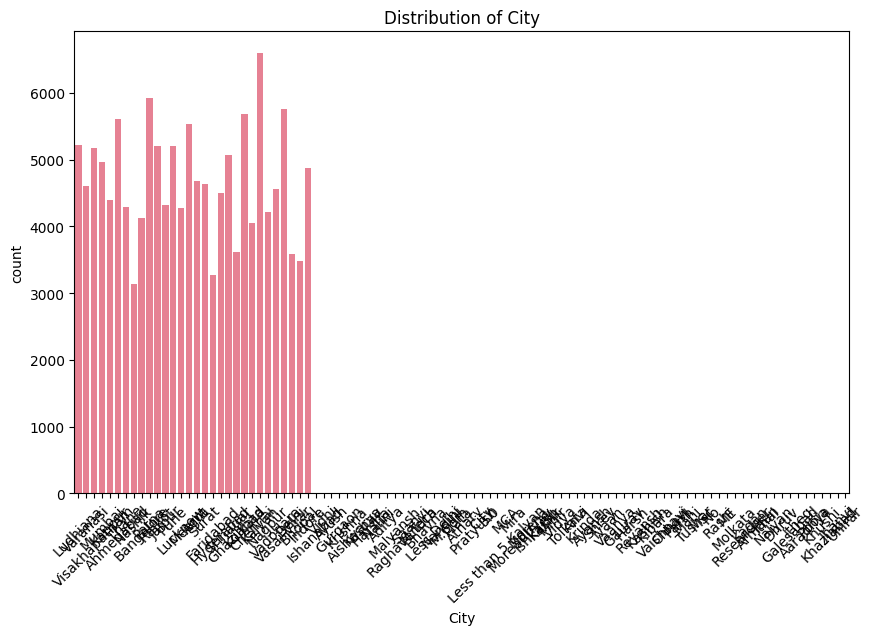

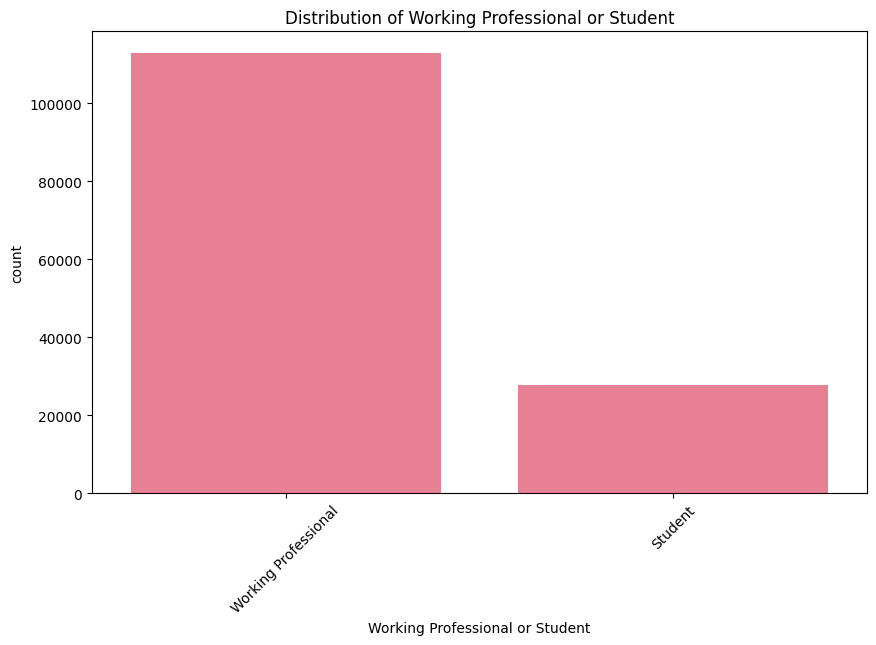

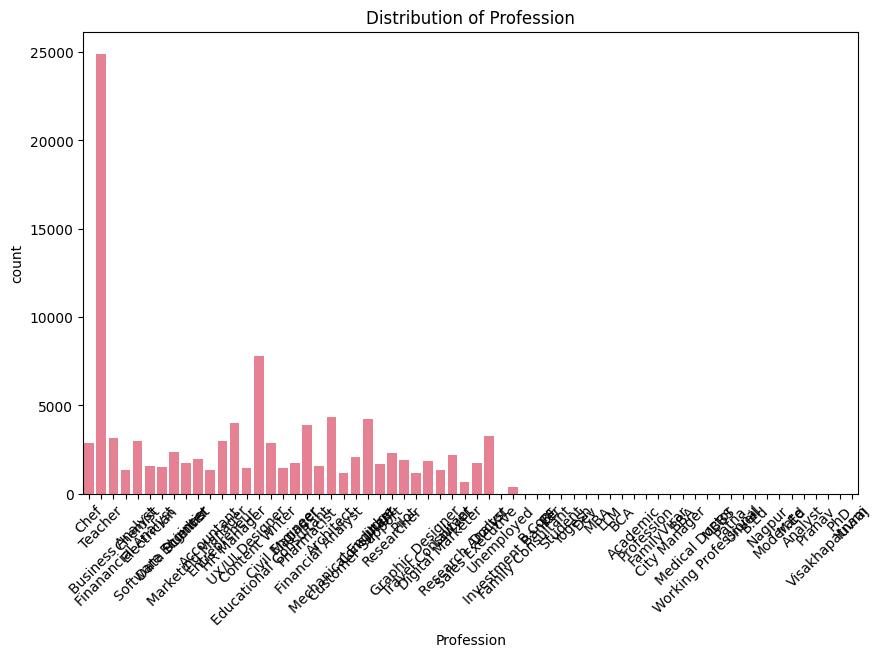

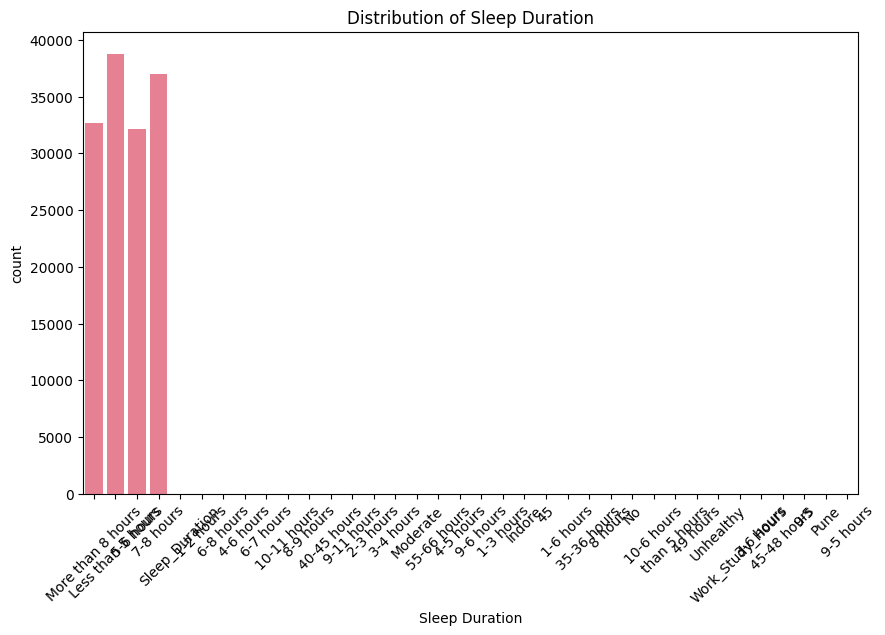

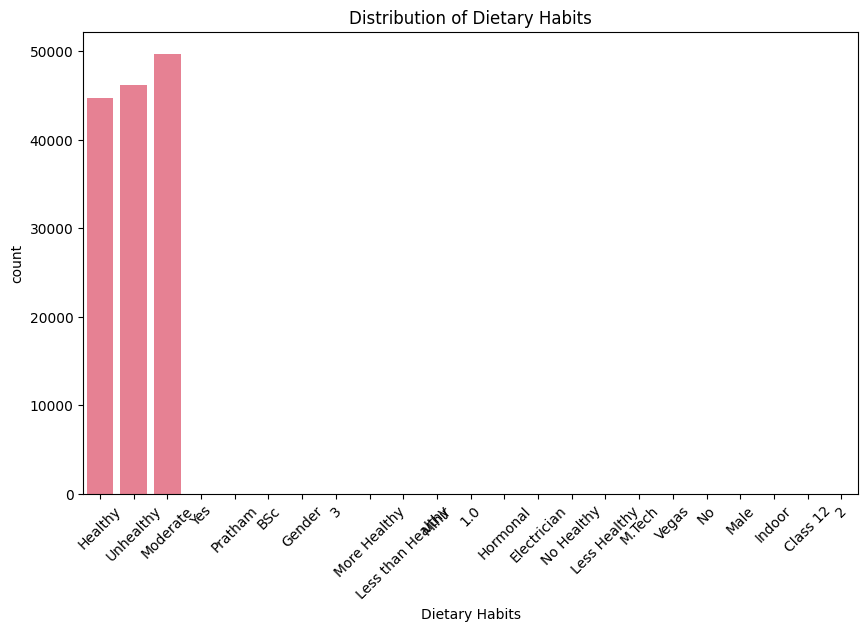

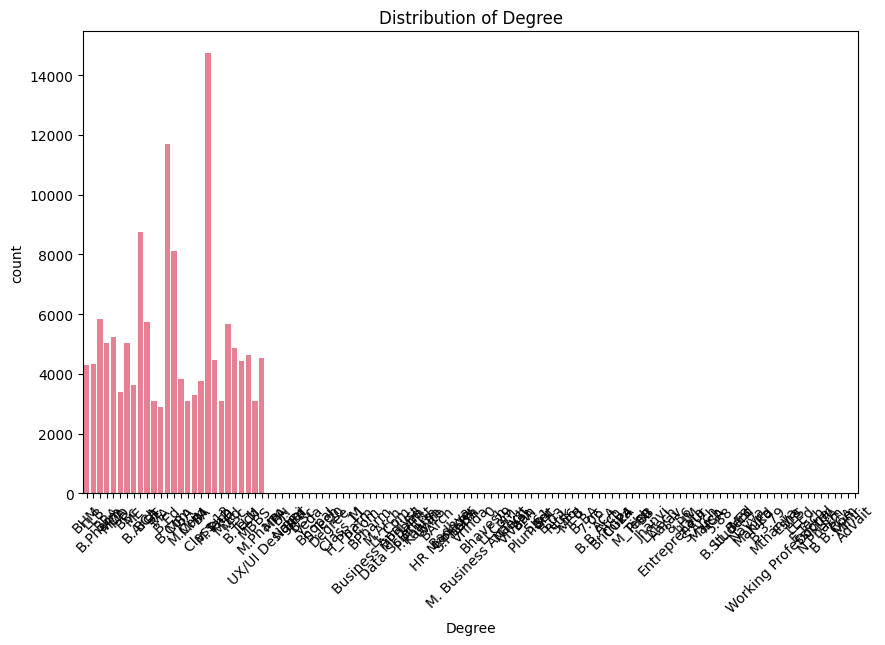

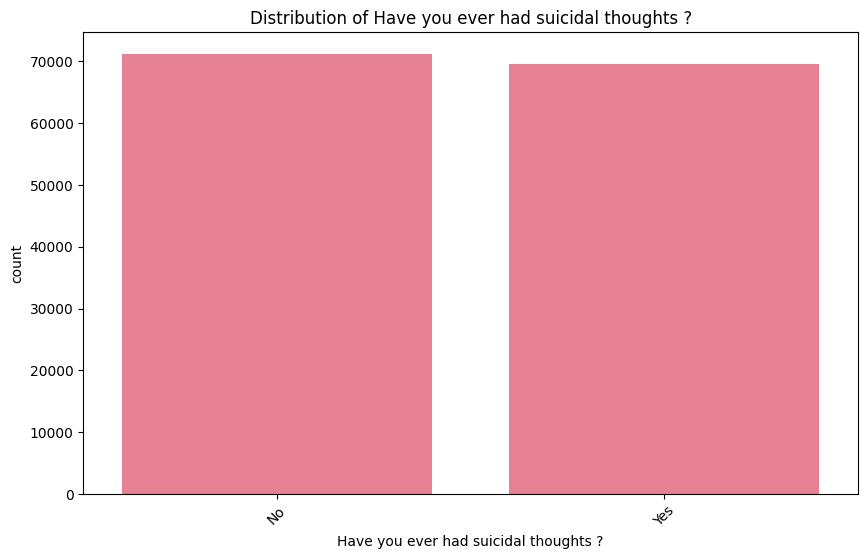

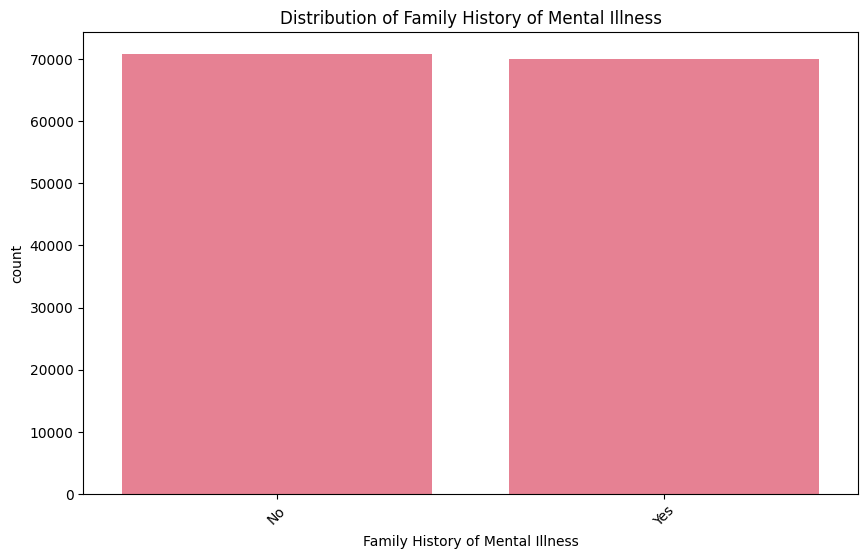

In [11]:
# Function to plot categorical feature distributions
def plot_categorical(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plot_categorical(train_df, column)

## Correlation Analysis

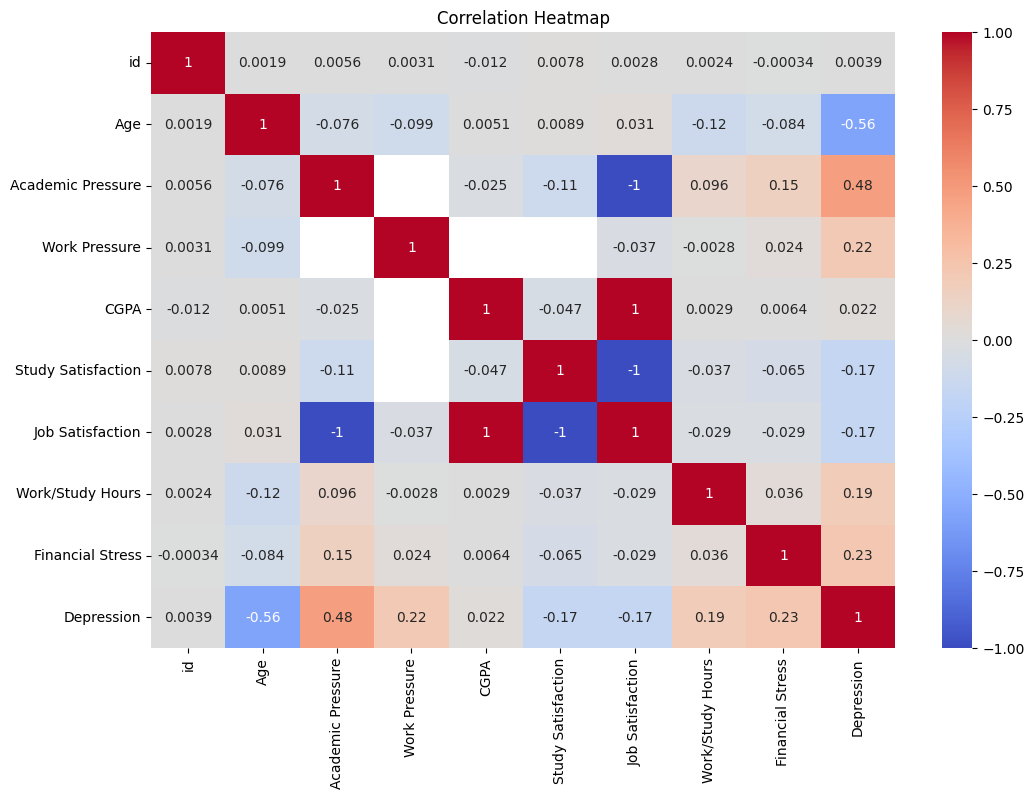

In [12]:
# Calculate correlation matrix for numerical features
correlation_matrix = train_df.select_dtypes(include=['int64', 'float64']).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()